          Date  Count
0   2015-07-30      1
1   2015-08-21      1
2   2015-08-28      2
3   2016-01-10      1
4   2016-01-22      1
5   2016-01-23      1
6   2016-02-14      1
7   2016-04-24      1
8   2016-05-13      1
9   2016-05-25      2
10  2016-06-11      2
11  2016-07-27      1
12  2016-08-02      2
13  2016-08-03      1
14  2016-08-07      2
15  2016-08-19      1
16  2016-08-21      1
17  2016-11-24      1


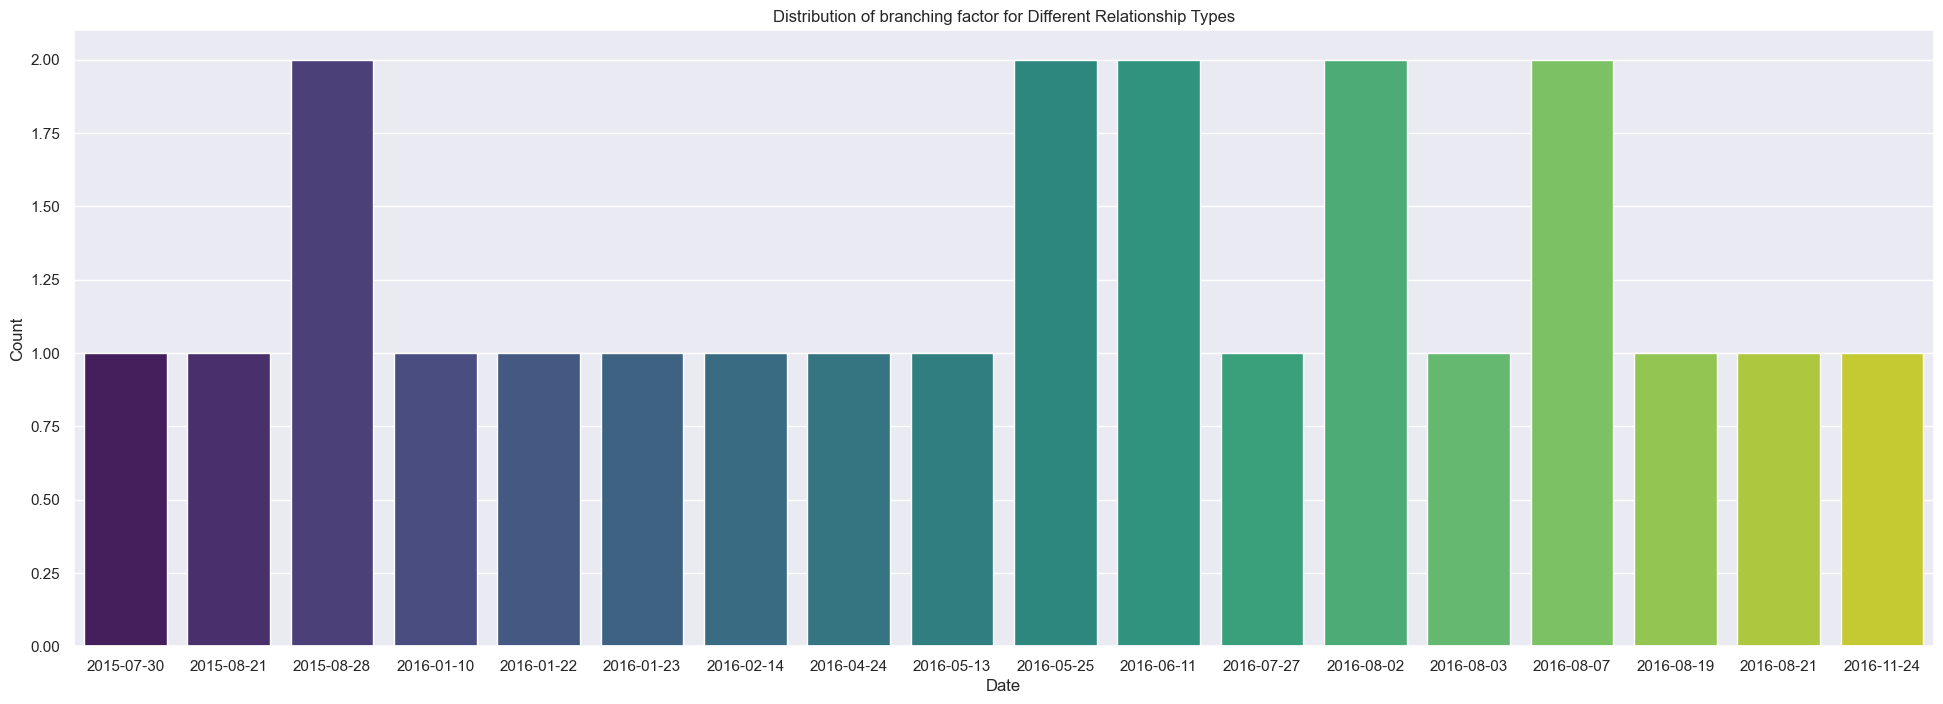

In [128]:
import datetime
from tick.hawkes import SimuHawkes, HawkesKernelTimeFunc, HawkesKernelExp, HawkesEM
from datetime import datetime
import pandas as pd
import  Hawkes as hk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


df_data.columns
timestamps = pd.to_datetime(df_data['timestamp'], format="%Y-%m-%d %H:%M:%S")
timestamps_df = pd.DataFrame(timestamps)
timestamps_df['timeDiff'] = (timestamps_df['timestamp'] - timestamps_df['timestamp'].min()).dt.total_seconds()
timestamps_df=timestamps_df.sort_values(by='timestamp')
from collections import Counter

# egoid and alterid here are taken as an example
telecomData = pd.read_csv('telcodataBrandNEW/46266_703559.csv')

# Convert the communication data to datetime format
communication_data = [datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S.%f') for timestamp_str in telecomData['timestamp']]

# Sort the datetime objects
sorted_data = sorted(communication_data)

dates = [dt.date() for dt in sorted_data]

# Count the number of occurrences of each date
date_counts = Counter(dates)
df_counts = pd.DataFrame(list(date_counts.items()), columns=['Date', 'Count'])

dates = [dt.date() for dt in sorted_data]

# Count the number of occurrences of each date
date_counts = Counter(dates)
df_counts = pd.DataFrame(list(date_counts.items()), columns=['Date', 'Count'])
sns.set(style="darkgrid")
print(df_counts)
# Create a bar plot of the date counts
plt.figure(figsize=(24, 8))
sns.barplot(x=df_counts['Date'], y=df_counts['Count'], palette='viridis')
plt.title('Distribution of branching factor for Different Relationship Types')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()
# history = pd.DataFrame({
#     'magnitude': 1,
#     'time': df_counts['Count'] #/ (3600)  # Convert time to days
# })

In [129]:
import numpy as np
from tick.hawkes import SimuHawkes, HawkesADM4, HawkesKernelPowerLaw, HawkesExpKern

history = pd.DataFrame({
    'magnitude': 1,
    'time': timestamps_df['timeDiff'] / (3600 * 24)  # Convert time to days
})

# Fit the Hawkes model and generate parameters
T = np.array(history['time']).astype('float64')
itv = [history['time'].min(), history['time'].max()]
modelFit = hk.estimator()
modelFit.set_kernel('exp')
modelFit.set_baseline('const')
modelFit.fit(T, itv)

mu = modelFit.parameter['mu']
alpha = modelFit.parameter['alpha']
beta = modelFit.parameter['beta']


print("Estimated mu:", mu)
print("Estimated alpha:", alpha)
print("Estimated beta (k in power-law):", beta)


Estimated mu: 0.4662459847716612
Estimated alpha: 0.726491601220047
Estimated beta (k in power-law): 661.006752754717


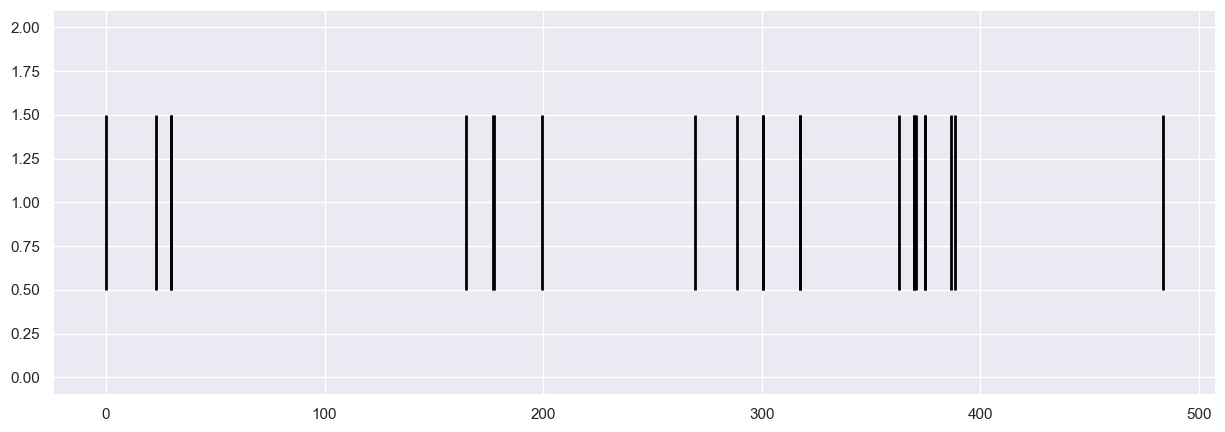

In [75]:
plt.figure(figsize=(15, 5))
plt.eventplot(T, color='black', linewidths=2)


Text(0, 0.5, 'Count')

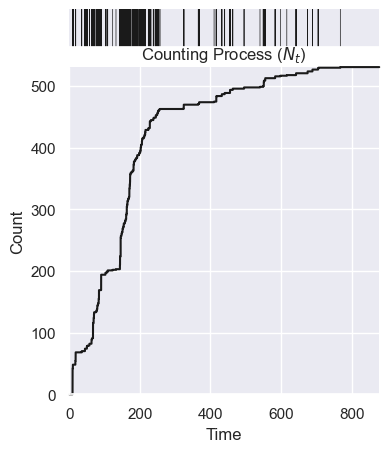

In [125]:
modelFit.plot_N()
plt.title('Counting Process ($N_t$)')
plt.xlabel('Time')
plt.ylabel('Count')

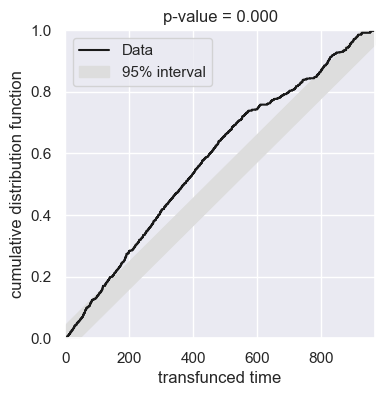

In [130]:


modelFit.plot_KS()


In [174]:
para = {'mu':mu, 'alpha':alpha, 'beta':beta}
itv = [0, 200]
model = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = model.simulate(itv)
T

array([  1.29198153,   6.42776334,   6.42998929,   7.63201432,
         7.63344036,   7.68783278,   7.68855429,   7.68947476,
         7.69118321,   7.69138064,   7.6918413 ,   7.6930289 ,
         7.69397551,   7.69497304,   7.69558632,  11.59469245,
        16.96424921,  16.96429718,  18.31050387,  19.0455531 ,
        20.97277756,  20.97317158,  20.97356177,  20.97370731,
        20.97393657,  20.9739607 ,  20.97417767,  20.97449083,
        20.97468494,  20.97469004,  20.97490578,  20.97512425,
        20.97530746,  20.97554797,  20.97580308,  20.97586591,
        20.97590947,  20.97603262,  20.97629799,  20.97631634,
        20.97640013,  20.97705362,  20.97750729,  22.87570061,
        31.53446868,  31.53556414,  31.53825144,  31.53859809,
        31.53909829,  31.53918266,  31.54026704,  31.54040293,
        31.54283174,  38.15624709,  39.09820214,  42.58533189,
        42.58663779,  42.58710485,  42.58844929,  42.59011281,
        42.59083253,  43.15769234,  45.71019272,  47.19

In [12]:
import numpy as np
import pandas as pd
from tick.hawkes import SimuHawkes, HawkesADM4, HawkesKernelPowerLaw, HawkesExpKern

# Assuming timestamps_df is a DataFrame containing 'timeDiff' column
history = pd.DataFrame({
    'magnitude': 1,
    'time': timestamps_df['timeDiff'] / (3600 * 24)  # Convert time to days
})

# Split the history into training (80%) and test (20%) sets
train_size = int(0.8 * len(history))
train_history = history.iloc[:train_size]
test_history = history.iloc[train_size:]
print(len(history))
# Fit the Hawkes model using the training set
T_train = np.array(train_history['time']).astype('float64')
itv_train = [train_history['time'].min(), train_history['time'].max()]

T = np.array(history['time']).astype('float64')
itv = [history['time'].min(), history['time'].max()]
# modelFit = hk.estimator()
# modelFit.set_kernel('exp')
# modelFit.set_baseline('const')
# modelFit.fit(T_train, itv_train)

modelFit = hk.estimator()
modelFit.set_kernel('pow')
modelFit.set_baseline('const')


modelFit.fit(T, itv)

mu = modelFit.parameter['mu']
alpha = modelFit.parameter['k']
beta = modelFit.parameter['p']


print("Estimated mu:", mu)
print("Estimated k:", alpha)
print("Estimated p (k in power-law):", beta)
print("LL:", modelFit.L)
print("branching factor:",modelFit.branching_ratio())



506
Estimated mu: 0.08692659918014292
Estimated k: 0.06379741644897247
Estimated p (k in power-law): 1.0046122662758699
LL: -41.265358902058495
branching factor: 14.370451923242149


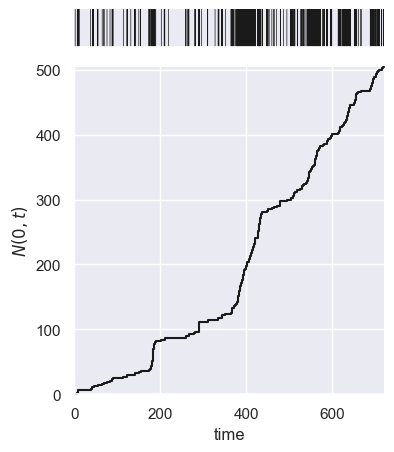

In [13]:
modelFit.plot_N()


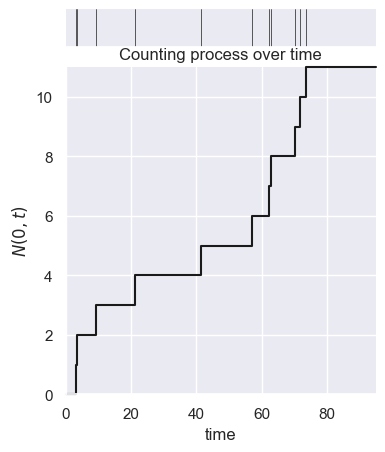

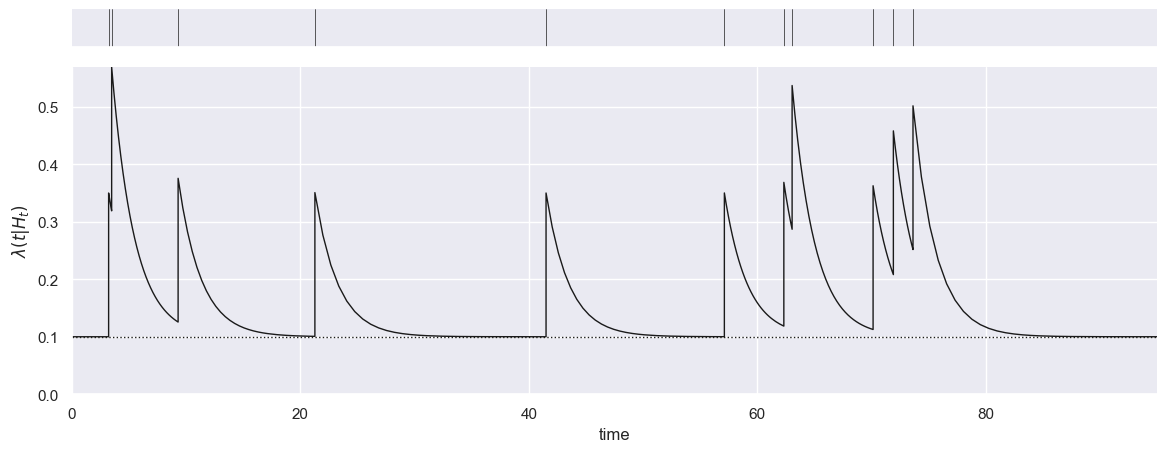

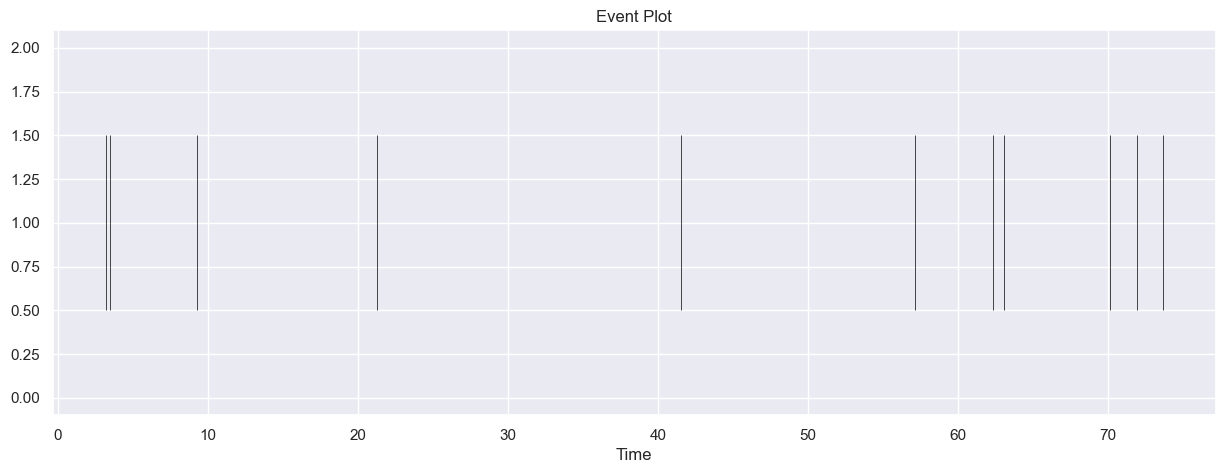

In [40]:
para = {'mu':0.1, 'alpha':0.5, 'beta':0.5}
itv = [0, 95]
model = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = model.simulate(itv)
model.plot_N()
plt.title('Counting process over time')
model.plot_l()
plt.figure(figsize=(15, 5))

plt.eventplot(T, color='black', linewidths=0.5)
plt.title('Event Plot')
plt.xlabel('Time')
plt.show()


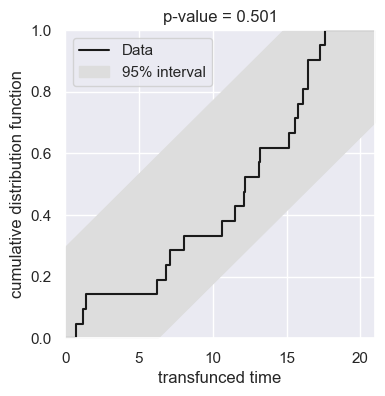

In [42]:
modelFit.plot_KS()

Text(0.5, 0, 'Time')

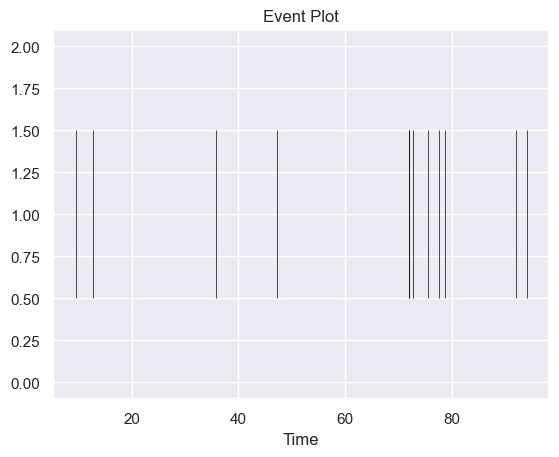

In [33]:
plt.eventplot(T, color='black', linewidths=0.5)
plt.title('Event Plot')
plt.xlabel('Time')


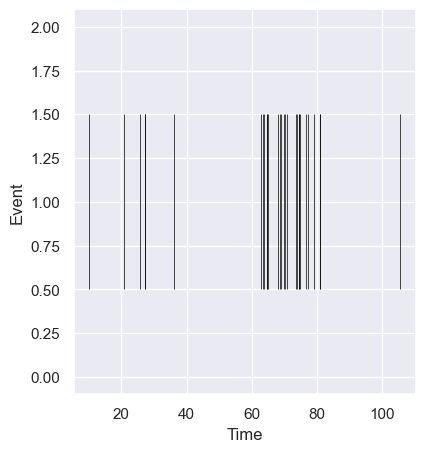

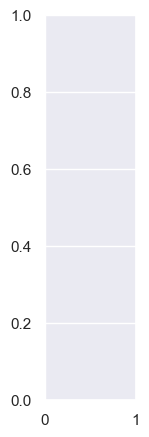

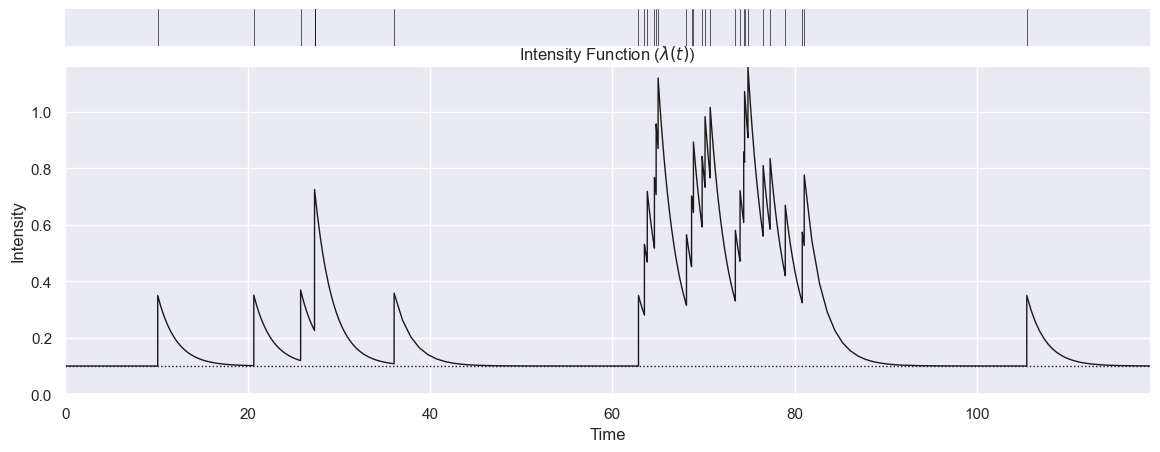

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import Hawkes as hk

# Define parameters
para = {'mu':0.1, 'alpha':0.5, 'beta':0.5}
itv = [0, 119]

# Simulate Hawkes process
model = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = model.simulate(itv)

# Plotting Example Realization
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.eventplot(T, color='black', linewidths=0.5)
plt.xlabel('Time')
plt.ylabel('Event')

# Plotting Counting Process
model.plot_N()


# Plotting Intensity Function
plt.subplot(133)
model.plot_l()
plt.title('Intensity Function ($\lambda(t)$)')
plt.xlabel('Time')
plt.ylabel('Intensity')

plt.show()


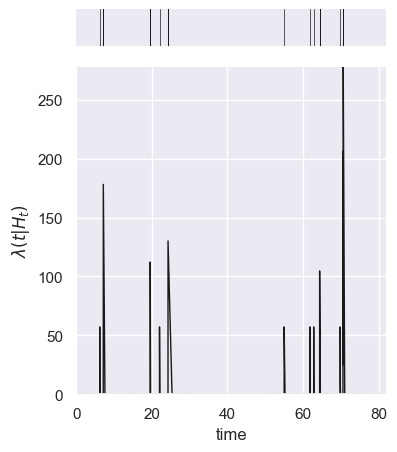

In [9]:
model.plot_l()

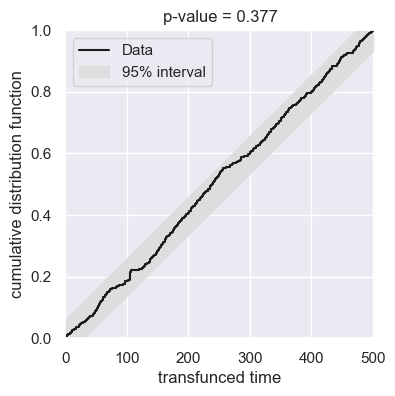

In [14]:
[T_trans, itv_trans] = modelFit.t_trans()
modelFit.plot_KS() 

In [ ]:
"""
This script processes a set of CSV files containing timestamp data, fits a Hawkes process model to each file, and saves the estimated parameters of the model to a DataFrame. 
The script processes the files in batches of 500 to avoid memory issues. Needs to be run again till all files are processed.
"""
import numpy
import warnings
import os
from datetime import datetime
import pandas as pd
import  Hawkes as hk
import numpy as np

# Specify the directory containing the CSV files
data_directory = 'telcodataBrandNEW/'

# Load the NetworkSurveyPivotShortened.xlsx file
network_survey_file = 'NetWorkSurveyPivotedShortened.csv'
network_survey_df = pd.read_csv(network_survey_file)

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['egoid', 'alterid', 'mu', 'k', 'p', 'c', 'branching factor',                                   'log likelihood', 'AIC',
                                  'Wave1_RelType', 'Wave2_RelType', 'Wave3_RelType', 'Wave4_RelType',
                                  'Wave5_RelType', 'Wave6_RelType', 'Wave7_RelType', 'Wave8_RelType'])

# Process files in batches of 500
batch_size = 500
file_list = os.listdir(data_directory)

try:
    for i in range(0, len(file_list), batch_size):
        batch_files = file_list[i:i + batch_size]
        print(f'Processing batch: {i} batch')
        for filename in batch_files:
            if filename.endswith(".csv"):
                # Extract egoid and alterid from the filename
                egoid, alterid = filename.replace('.csv', '').split('_')
                print(f'Processing file {filename}')

                # Load the data
                df_data = pd.read_csv(os.path.join(data_directory, filename))
                timestamps = pd.to_datetime(df_data['timestamp'], format="%Y-%m-%d %H:%M:%S")
                timestamps_df = pd.DataFrame(timestamps)
                timestamps_df['timeDiff'] = (timestamps_df['timestamp'] - timestamps_df['timestamp'].min()).dt.total_seconds()
                timestamps_df = timestamps_df.sort_values(by='timestamp')

                if(len(timestamps_df) < 41):
                    print(f'LENGTH OUT OF BOUNDS, SKIPPING {filename}')
                    continue

                # Convert timestamps to event times
                history = pd.DataFrame({
                    'magnitude': 1,
                    'time': timestamps_df['timeDiff'] / (3600 * 24)  # Convert time to days
                })


                T = np.array(history['time']).astype('float64')
                itv = [history['time'].min(), history['time'].max()]
                modelFit = hk.estimator()
                modelFit.set_kernel('pow')
                modelFit.set_baseline('const')

                try:
                    modelFit.fit(T, itv)
                except (RuntimeWarning,KeyboardInterrupt) :
                    print(f"Runtime exception, skipping for i={i}")
                    continue

                # Extract parameters
                mu = modelFit.parameter['mu']
                k = modelFit.parameter['k']
                p = modelFit.parameter['p']
                c = modelFit.parameter['c']



                print("parameter:",modelFit.parameter) # the estimated parameter values
                print("branching ratio:",modelFit.br) # the branching ratio
                print("log-likelihood:",modelFit.L) # the log-likelihood of the estimated parameter values
                print("AIC:",modelFit.AIC)
                print(f'{egoid} and {alterid}')
                # Append results to the result DataFrame
                result_df = result_df.append({
                    'egoid': egoid,
                    'alterid': alterid,
                    'mu': mu,
                    'k': k,
                    'p':p,
                    'c': c,
                    'branching factor': modelFit.br,
                    'log likelihood': modelFit.L,
                    'AIC': modelFit.AIC,
                }, ignore_index=True)
except KeyboardInterrupt:
    print("Process interrupted. Saving current results...")
    result_df.to_csv('HawkesResultFits_POW_interrupted(7)_3rdDec.csv', index=False)
    print("Results saved.")
    raise  # Re-raise the KeyboardInterrupt to exit the program


# Save the result DataFrame to a CSV file
result_df.to_csv('HawkesResultFits_POW.csv', index=False)


Processing batch: 0 batch
Processing file 42617_573480.csv


c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\Hawkes\model.py:790: RuntimeWarning: overflow encountered in exp
  H   = delta * k * np.exp( log_dphi + (p-1)*log_phi - c*phi ) / gamma(p)
c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\Hawkes\model.py:790: RuntimeWarning: invalid value encountered in true_divide
  H   = delta * k * np.exp( log_dphi + (p-1)*log_phi - c*phi ) / gamma(p)
c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\Hawkes\model.py:799: RuntimeWarning: overflow encountered in exp
  H_k = delta *     np.exp( log_dphi + (p-1)*log_phi - c*phi ) / gamma(p)
c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\Hawkes\model.py:799: RuntimeWarning: invalid value encountered in true_divide
  H_k = delta *     np.exp( log_dphi + (p-1)*log_phi - c*phi ) / gamma(p)
c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\Hawkes\model.py:800: RuntimeWarning: overflow encountered 

Runtime exception, skipping for i=0
Processing file 42617_580142.csv
parameter: {'mu': 0.40289862607350685, 'k': 0.004513304858480952, 'p': 1.6281808188420714, 'c': 0.00042584907669550363}
branching ratio: 0.9415576288462937
log-likelihood: 39521.95544563226
AIC: -79035.91089126452
42617 and 580142
Processing file 42617_847224.csv
parameter: {'mu': 0.11414094669786579, 'k': 0.0023501303631515624, 'p': 1.698147247486367, 'c': 0.0004459215010994813}
branching ratio: 0.73528539419826
log-likelihood: 1249.4858969128948
AIC: -2490.9717938257895
42617 and 847224
Processing file 42646_304715.csv
parameter: {'mu': 0.21446245039956227, 'k': 0.036017791819914276, 'p': 1.2481725719594643, 'c': 0.00045330141120573356}
branching ratio: 0.9807454956496328
log-likelihood: 9895.15915144145
AIC: -19782.3183028829
42646 and 304715
Processing file 42646_383634.csv
parameter: {'mu': 0.7386751748599546, 'k': 0.017065239341697055, 'p': 1.375602812647291, 'c': 0.0003380717771069144}
branching ratio: 0.914318

c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\Hawkes\model.py:180: RuntimeWarning: invalid value encountered in true_divide
  G = { key: (dl[key]/l).sum(axis=-1) - dInt[key] for key in dl }


Runtime exception, skipping for i=0
Processing file 43177_459011.csv
Runtime exception, skipping for i=0
Processing file 43177_546884.csv
parameter: {'mu': 0.49375431127631286, 'k': 0.01299650254677617, 'p': 1.4223536258640253, 'c': 0.0003223305645905351}
branching ratio: 0.9180826833443897
log-likelihood: 30736.250678550936
AIC: -61464.50135710187
43177 and 546884
Processing file 43177_587479.csv
parameter: {'mu': 0.01909066824622002, 'k': 0.016298955869462582, 'p': 1.3954061517830738, 'c': 0.0003137246561122649}
branching ratio: 1.0009273987928233
log-likelihood: 45155.74650143672
AIC: -90303.49300287344
43177 and 587479
Processing file 43177_872567.csv
parameter: {'mu': 0.3155094772094055, 'k': 0.012129113396559017, 'p': 1.4322913772541084, 'c': 0.0003046022899778623}
branching ratio: 0.929189549628129
log-likelihood: 23565.570663312115
AIC: -47123.14132662423
43177 and 872567
Processing file 43177_918817.csv
parameter: {'mu': 0.223157445147603, 'k': 0.006440847831059244, 'p': 1.543

c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\Hawkes\model.py:790: RuntimeWarning: overflow encountered in multiply
  H   = delta * k * np.exp( log_dphi + (p-1)*log_phi - c*phi ) / gamma(p)
c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\Hawkes\model.py:800: RuntimeWarning: overflow encountered in multiply
  H_p = delta * k * np.exp( log_dphi + (p-1)*log_phi - c*phi ) / gamma(p) * (log_phi-digamma(p))
c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\Hawkes\model.py:801: RuntimeWarning: overflow encountered in multiply
  H_c = delta * k * np.exp( log_dphi +     p*log_phi - c*phi ) / gamma(p) * (-1)


Runtime exception, skipping for i=0
Processing file 45076_271164.csv
parameter: {'mu': 0.8082396035178057, 'k': 0.018810069461715834, 'p': 1.3349005611053382, 'c': 0.00035539866237655653}
branching ratio: 0.8028635508315648
log-likelihood: 10012.209866114597
AIC: -20016.419732229195
45076 and 271164
Processing file 45076_338333.csv
parameter: {'mu': 0.22411132133575246, 'k': 0.005815997904930239, 'p': 1.5435420139006197, 'c': 0.00039655977922391754}
branching ratio: 0.7557067156278984
log-likelihood: 2456.056765784815
AIC: -4904.11353156963
45076 and 338333
Processing file 45375_535424.csv
parameter: {'mu': 3.8474979027283007, 'k': 0.007343986021493553, 'p': 1.5103069042148953, 'c': 0.00042213974906918074}
branching ratio: 0.7588455169596453
log-likelihood: 27382.228265314217
AIC: -54756.456530628435
45375 and 535424
Processing file 45375_55881.csv
parameter: {'mu': 1.6375906596134269, 'k': 0.02561203873457568, 'p': 1.2755137170745823, 'c': 0.0002794503327154988}
branching ratio: 0.885

In [2]:
import pandas as pd

# Load the CSV files into pandas DataFrames
file1 = pd.read_csv('RESULTS/HawkesResultFits_EXP_KERNEL.csv')
file2 = pd.read_csv('RESULTS/COMPLIED_POWER_LAW_RESULTS.csv')

# Merge the two DataFrames on 'egoid' and 'alterid'
merged = pd.merge(file1, file2, on=['egoid', 'alterid'], how='left', indicator=True)

# Filter rows where the indicator column is 'left_only' to get pairs in file1 but not in file2
missing_pairs = merged[merged['_merge'] == 'left_only'][['egoid', 'alterid']]

# Display or save the result
print(missing_pairs)

# Save the result to a new CSV file if needed
missing_pairs.to_csv('missing_pairs.csv', index=False)


      egoid  alterid
12    10732   731337
34    11402   980069
38    12156   469394
41    12156   838798
50    14301    38610
...     ...      ...
3102  98462   361461
3103  98462   414798
3115  98624   944391
3117  98700    51760
3138  99733   568520

[261 rows x 2 columns]


In [10]:
import pandas as pd
df1 = pd.read_csv('telcodataBrandNEW/10153_155221.csv')
df2 = pd.read_csv('telcodataBrandNEW/10732_731337.csv')
timestamps1 = pd.to_datetime(df1['timestamp'], format="%Y-%m-%d %H:%M:%S")
timestamps_df1 = pd.DataFrame(timestamps1)
timestamps_df1['timeDiff'] = (timestamps_df1['timestamp'] - timestamps_df1['timestamp'].min()).dt.total_seconds()/ (24 * 60 * 60)
timestamps_df1 = timestamps_df1.sort_values(by='timestamp')
timestamps_df1

,timestamp,timeDiff
1035,2015-01-03 09:45:20,0.000000
1034,2015-01-03 09:45:32,0.000139
1033,2015-01-03 09:45:58,0.000440
1032,2015-01-03 09:47:16,0.001343
1031,2015-01-03 09:47:28,0.001481
...,...,...
5410,2018-08-03 19:29:15,1308.405498
5029,2018-08-05 13:24:55,1310.152488
6161,2018-08-12 16:37:34,1317.286273
6325,2018-08-19 20:37:23,1324.452812


In [11]:
timestamps2 = pd.to_datetime(df2['timestamp'], format="%Y-%m-%d %H:%M:%S")
timestamps_df2 = pd.DataFrame(timestamps2)
timestamps_df2['timeDiff'] = (timestamps_df2['timestamp'] - timestamps_df2['timestamp'].min()).dt.total_seconds()/ (24 * 60 * 60)
timestamps_df2= timestamps_df2.sort_values(by='timestamp')
timestamps_df2

,timestamp,timeDiff
501,2015-01-01 16:46:56,0.000000
500,2015-01-01 16:47:16,0.000231
178,2015-01-02 11:30:24,0.780185
107,2015-01-07 16:00:43,5.967905
24,2015-01-08 22:14:50,7.227708
...,...,...
2543,2016-12-09 20:09:20,708.140556
2546,2016-12-09 20:09:35,708.140729
2547,2016-12-09 20:09:59,708.141007
2548,2016-12-09 20:10:39,708.141470
